In [1]:
import os
import os.path as osp

import time
from PIL import Image
import numpy as np

In [2]:
data_path = osp.join('.', 'data')
pano_path = osp.join(data_path, 'pano2.png')

In [3]:
pano_img = Image.open(pano_path)
pano_img = pano_img.convert('RGB')
pano = np.asarray(pano_img)

In [4]:
from matplotlib.pyplot import imshow
%matplotlib inline

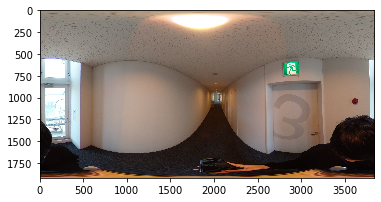

In [5]:
imshow(pano)

## manipulate image

In [6]:
pano.shape

(1920, 3840, 3)

In [7]:
pano = np.transpose(pano, (2,0,1))

In [8]:
channels, h_pano, w_pano = pano.shape
print(channels, h_pano, w_pano)

3 1920 3840


In [ ]:
# rotation matrix
# roll: calculate rotation about the x-axis
R_x = np.array([
    [1., 0., 0.],
    [0., np.cos(roll), -np.sin(roll)],
    [0., np.sin(roll), np.cos(roll)]])
# pitch: calculate rotation about the y-axis
R_y = np.array([
    [np.cos(pitch), 0., np.sin(pitch)],
    [0., 1., 0.],
    [-np.sin(pitch), 0., np.cos(pitch)]])
# yaw: calculate rotation about the z-axis
R_z = np.array([
    [np.cos(yaw), -np.sin(yaw), 0.],
    [np.sin(yaw), np.cos(yaw), 0.],
    [0., 0., 1.]])

R = R_z @ R_y @ R_x

In [9]:
def linear_interp(v0, v1, d, l):
    return v0*(1-d)/l + v1*d/l

In [10]:
out = np.zeros((channels, h_pano, w_pano))

In [37]:
for uj in range(h_pano):
    for ui in range(w_pano):
        
        # get current pixel in rotation
        phi = (ui - w_pano/2) * 2*np.pi / w_pano
        theta = (uj - h_pano/2) * np.pi / h_pano
        
        # rotate 
        phi += np.pi / 4
        theta += np.pi / 12
        
        if phi > np.pi:
            phi += -2*np.pi
        elif phi < -np.pi:
            phi += 2*np.pi
            
        if theta > np.pi/2:
            theta += -np.pi
        elif theta < np.pi/2:
            theta += np.pi
        
        # sample pixels
        vi = (phi * w_pano) / (2*np.pi)
        vj = (theta - np.pi/2) * h_pano / np.pi
        vi = int(vi)
        vj = int(vj)
        
        out[:,uj,ui] = pano[:,vj,vi]

In [38]:
pano_out = np.transpose(out, (1,2,0))
pano_out = pano_out.astype('uint8')
print(pano_out.shape)
print(pano_out.dtype)

(1920, 3840, 3)
uint8


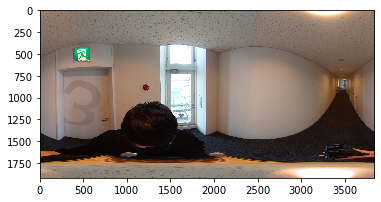

In [39]:
imshow(pano_out)

In [57]:
from pano2pers_numpy import faster_sample

In [58]:
sampled = faster_sample(pano, grid, mode='bilinear')

In [59]:
new_pano = np.transpose(sampled, (1,2,0))

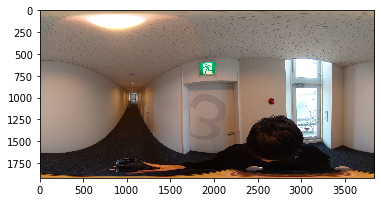

In [60]:
imshow(new_pano)